## This notebook takes modeled spectra of source and background, rastering them together, with multiple signal:background ratios.
## The resulting data set can be used to train predictive models.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime

In [80]:
# load source and background files
data_source = pd.read_csv('/Users/mooreet_la/projects/SDRD/competition/data/trainingData/100004.csv',header=None,index_col=None)
data_source.columns = ['timeDelta', 'energy']
data_array = data_source.as_matrix()
#data_bg = pd.read_csv('/Users/mooreet_la/Data_science/Data/Emma_asym/SSAM_Bkgds_24April2017.csv')

In [379]:
# running sum   pd.Series.cumsum()
data_source['time'] = data_source['timeDelta'].cumsum(axis=0)
data_source['spectra'] = data_source['time'] // 1000000
print(s)
data_source.head()

    timeDelta  energy
0           0   233.0
1        2058    74.0
2        1798   674.9
3         222   643.0
4        4197   283.8
5         202   326.1
6         210   110.1
7         992   447.2
8         291    63.8
9         518   151.8
10          4   109.0
11        996    80.9
12       1276  1782.7
13       1504   623.1
14       1291  1044.2


,timeDelta,energy,time,spectra
0,0,233.0,0,0
1,2058,74.0,2058,0
2,1798,674.9,3856,0
3,222,643.0,4078,0
4,4197,283.8,8275,0


In [367]:
# check counts
#print(data_source['spectra'].value_counts())
#print(data_source['spectra'].dtypes)
gross_cnts = data_source['spectra'].value_counts().astype('int64')



print(gross_cnts.dtypes)
print(type(gross_cnts))
gross_cnts['cps'] = gross_cnts.index
gross_cnts = gross_cnts.to_frame()
print(gross_cnts.dtypes)
print(type(gross_cnts))
gross_cnts.reset_index(level=0, inplace=True)
gross_cnts.columns = ['spectra', 'cps']
#print(gross_cnts.head())
#gross_cnts['spectra'] = gross_cnts['spectra'].tolist()
#gross_cnts['spectra'] = gross_cnts['spectra'].astype('int64')
#gross_cnts.head()
#gross_cnts = gross_cnts.to_frame()
#gross_cnts.reshape()
#print(type(gross_cnts.spectra))
#print(type(gross_cnts['cps']))
gross_cnts.tail()
#gross_cnts['spectra'] = (gross_cnts.spectra / 100).astype('int')
gross_cnts.to_csv('/Users/mooreet_la/projects/SDRD/competition/temp.csv', index= False)
gross_cnts_new = pd.read_csv('/Users/mooreet_la/projects/SDRD/competition/temp2.csv')#, index= False)
#print(pd.factorize(gross_cnts.spectra))
#(array([0, 1, 1, 2, 2, 2, 3]), 
# Index([u''John'', u''Mary'', u''Adam'', u''Andrew''], dtype='object'))

#gross_cnts['spectra'] = pd.factorize(gross_cnts.spectra)[0]
#print(gross_cnts.spectra)
print(gross_cnts_new.head())
#gross_cnts.astype('int64')

print(gross_cnts_new['spectra'].dtypes)
#ts_grouped = rise_p.groupby('ts')
bck_gnd = gross_cnts_new.loc[gross_cnts_new.spectra <= 30]#, ['spectra','cps']]
#k1 = df.loc[(df.Product == p_id) & (df.Time >= start_time) & (df.Time < end_time), ['Time', 'Product']]
fore_gnd = gross_cnts_new.loc[gross_cnts_new.spectra >= 55]
#gross_cnts['spectra'].iloc[[i for i, name in enumerate(gross_cnts.cps) if "6" in name]] = 'Ba133'
print(type(fore_gnd))
fore_gnd.head()
#gross_cnts.dtypes
#gross_cnts.head()
fore_gnd = fore_gnd.as_matrix()

int64
<class 'pandas.core.series.Series'>
spectra    object
dtype: object
<class 'pandas.core.frame.DataFrame'>
   spectra   cps
0       66  1982
1       77  1766
2       69  1754
3       70  1751
4       67  1733
int64
<class 'pandas.core.frame.DataFrame'>


<class 'numpy.ndarray'>
[66 77 69 70 67 76 65 68 78 75 71 72 74 73 55 64 56 63 57 62 58 59 60 61 79]


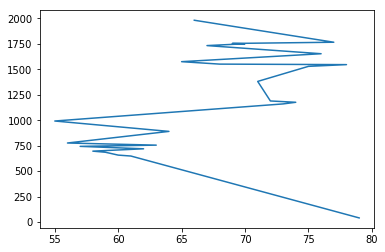

In [378]:
n_bins = 1024


print(type(fore_gnd))
#print(fore_gnd)
time = fore_gnd[:,0]
counts = fore_gnd[:,1]
print(time)

#time = [bck_gnd[0]]#.astype('int64')
#counts = [bck_gnd['cps']]#.astype('int64')

#fig, axs = plt.subplots(1,1, sharey=True, tight_layout=False, figsize=(17,10))
#axs.set_yscale='log'
#axs.set_yscale('log')
#plt.yscale('log', nonposy='clip')
#axs.hist(energy, bins=n_bins)

plt.plot(time,counts)
plt.show()

In [364]:
print(data_array[:5])
g = np.sum(data_array, axis=0)
print(g.shape)
print(g)

[[    0.    233. ]
 [ 2058.     74. ]
 [ 1798.    674.9]
 [  222.    643. ]
 [ 4197.    283.8]]
(2,)
[ 79029470.   23582319.1]


In [85]:
print(5/2)
print(5//2)

2.5
2


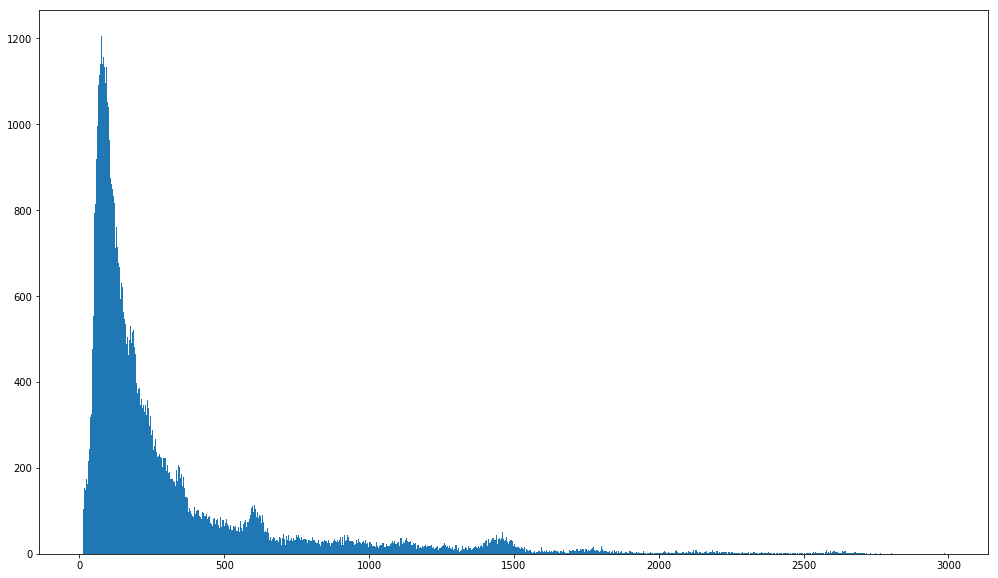

In [72]:
n_bins = 1024
time = data_source['time']
energy = data_source['energy']

fig, axs = plt.subplots(1,1, sharey=True, tight_layout=False, figsize=(17,10))
#axs.set_yscale='log'
#axs.set_yscale('log')
#plt.yscale('log', nonposy='clip')
axs.hist(energy, bins=n_bins)
plt.show()

(array([1, 0, 0, ..., 0, 0, 1], dtype=int64), array([   74.    ,    75.9375,    77.875 , ...,  2054.125 ,  2056.0625,
        2058.    ]))


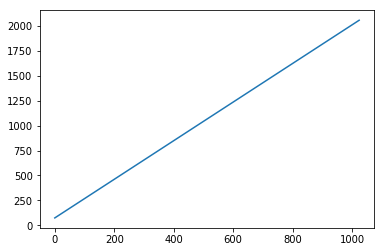

In [70]:
f = np.histogram(data_array[1], bins=1024)
print(f)
plt.plot(f[1])
plt.show()

In [76]:
dt.timedelta(days=3, milliseconds=4)
dt.timedelta(3, 0, 4000)
dt.timedelta(3, 0, 0, 4) #no need for that.
dt.timedelta(3, 0, 4000)

datetime.timedelta(3, 0, 4000)

In [50]:
#load answers
training_labels = pd.read_csv('/Users/mooreet_la/projects/SDRD/competition/data/answers.csv', index_col=None)
training_labels = training_labels.drop('Unnamed: 3', axis=1)

In [71]:
print(training_labels.shape)
training_labels

(9800, 3)


,RunID,SourceID,SourceTime
0,100001,0,0.00
1,100002,0,0.00
2,100003,0,0.00
3,100004,1,65.58
4,100005,0,0.00
5,100006,6,36.19
6,100007,1,44.10
7,100008,1,61.47
8,100009,0,0.00
9,100010,0,0.00


In [3]:
# 'SourceIDs' will be used for training the classification models

training_labels['SourceIDs'].iloc[[i for i, name in enumerate(data_source.Name) if "CO" in name]] = 'Co60'
data_source['SourceIDs'].iloc[[i for i, name in enumerate(data_source.Name) if "BA" in name]] = 'Ba133'
data_source['SourceIDs'].iloc[[i for i, name in enumerate(data_source.Name) if "COBA" in name]] = 'Co60'
data_source['SourceIDs'].iloc[[i for i, name in enumerate(data_source.Name) if "CS" in name]] = 'Cs137'
data_source['SourceIDs'].iloc[[i for i, name in enumerate(data_source.Name) if "IR" in name]] = 'Ir192'
data_source['SourceIDs'].iloc[[i for i, name in enumerate(data_source.Name) if "SE" in name]] = 'Se75'

data_bg.SourceIDs = 'BG'

C:\Users\mooreet_la\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [4]:
# check counts
print(training_labels['SourceID'].value_counts())

0    5000
6     800
5     800
4     800
3     800
2     800
1     800
Name: SourceID, dtype: int64


In [6]:
# take a peak at the data

data_source.head(5)

,Name,Title,Strength,SourceIDs,Date,CharTag,TimeLive,TimeTrue,HalfLife,Weight,...,Channel1014,Channel1015,Channel1016,Channel1017,Channel1018,Channel1019,Channel1020,Channel1021,Channel1022,Channel1023
0,BABA10,NaN,NaN,NaN,03-Mar-2017 12:59:4,,84754.1,86400,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BABA11,NaN,NaN,NaN,03-Mar-2017 12:59:4,,85057.3,86400,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BABA12,NaN,NaN,NaN,03-Mar-2017 12:59:4,,85286.8,86400,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BABA13,NaN,NaN,NaN,03-Mar-2017 12:59:4,,85464.3,86400,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BABA14,NaN,NaN,NaN,03-Mar-2017 12:59:4,,85604.3,86400,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# take a peak at the background file

data_bg

,Name,Title,Strength,SourceIDs,Date,CharTag,TimeLive,TimeTrue,HalfLife,Weight,...,Channel1014,Channel1015,Channel1016,Channel1017,Channel1018,Channel1019,Channel1020,Channel1021,Channel1022,Channel1023
0,ABQ,NaN,NaN,BG,03-Mar-2017 12:59:4,,84945.8,86400,0,0,...,895.125,887.101,877.227,865.288,851.053,834.648,816.724,797.937,778.838,759.680
1,ATLANTA,NaN,NaN,BG,03-Mar-2017 12:59:4,,85061.6,86400,0,0,...,437.137,433.220,428.398,422.569,415.617,407.602,398.846,389.671,380.357,371.045
2,INDIANAPOLIS,NaN,NaN,BG,03-Mar-2017 12:59:4,,85252.2,86400,0,0,...,428.298,424.453,419.711,413.966,407.109,399.202,390.564,381.518,372.352,363.239
3,LASVEGAS,NaN,NaN,BG,03-Mar-2017 12:59:4,,84516.2,86400,0,0,...,516.962,512.325,506.633,499.764,491.583,482.161,471.864,461.055,450.025,438.832
4,NEWYORK,NaN,NaN,BG,03-Mar-2017 12:59:4,,85655.7,86400,0,0,...,379.082,375.655,371.423,366.288,360.155,353.079,345.351,337.270,329.114,321.096
5,SEATTLE,NaN,NaN,BG,03-Mar-2017 12:59:4,,85652.5,86400,0,0,...,391.764,388.223,383.851,378.547,372.212,364.904,356.922,348.576,340.152,331.870
6,KMAX,NaN,NaN,BG,03-Mar-2017 12:59:4,,82237.3,86400,0,0,...,419.096,414.639,409.272,402.634,394.984,386.368,377.045,367.237,357.223,346.686
7,UMAX,NaN,NaN,BG,03-Mar-2017 12:59:4,,83511.2,86400,0,0,...,504.547,500.871,496.308,490.754,484.100,476.397,467.938,458.988,449.685,439.831
8,THMAX,NaN,NaN,BG,03-Mar-2017 12:59:4,,85189.6,86400,0,0,...,380.843,377.278,372.893,367.600,361.293,353.939,345.965,337.727,329.375,321.063


In [6]:
# this function takes two data frames - source and background - and rasters them together
# it scales the source spectrum to vary signal:background ratio
# the output size is number of source spectra x number of bg spectra x number of scaling factors

def raster_data(data_source, data_bg, scale):
    # scale object needs to be a 1-d vector
    x = len(scale)       
    BG = pd.DataFrame(columns = list(data_bg))
    Source = pd.DataFrame(columns =list(data_source))
    
    #create data frame of BG spectra
    for i in range(0,len(data_bg)):  
        BG_row = data_bg.loc[i:i,:]
        BG = BG.append([BG_row]*(x))
        #BG.Strength = np.sum(BG.loc[:,'Channel0':], axis=1)              
    BG.index = range(len(BG))   
    
    
    for j in range(0,len(data_source)): 
        row = data_source.loc[j:j,:]
        row = row.append([row]*(x-1))
        row.loc[:,'Channel0':'Channel1023'] = np.multiply(row.loc[:,'Channel0':'Channel1023'],scale)  
        row.loc[:,'TotCounts'] = np.sum(row.loc[:,'Channel0':'Channel1023'], axis=1)
        #print(row.TotCounts)
        row = row.append([row]*(len(data_bg)-1))
        row.index = range(len(row))     

#        row.loc[:,'Channel0':'Channel1023'] = row.loc[:,'Channel0':'Channel1023'] + BG
        row.loc[:,'Channel0':'TotCounts'] = row.loc[:,'Channel0':'TotCounts'] + BG
        row.Title = BG.Name
        
        row.Strength = np.divide((row.TotCounts - BG.TotCounts), BG.TotCounts)  
        
        #w = np.sum(row.loc[:,'Channel0':], axis=1)
        #row.Strength = np.divide(w, BG.Strength)
        Source = Source.append(row)
        #if j%20==0:
        #    print(BG.Strength.loc)
        #    print(w)
    #print(BG.Strength)
    #print(w)        
    Source.index = range(len(Source))        
    return Source


### Step 1: scale data from 24hrs to 1 second & retain channel 530

In [9]:
# all spectra were created with 24 hr live-times
# 1 second live-time is more realistic

timescale = 1.0/(60*60*24)
data_bg_1sec = pd.DataFrame.copy(data_bg)
data_bg_1sec.loc[:,'Channel0':'Channel1023'] = np.multiply(data_bg_1sec.loc[:,'Channel0':'Channel1023'],timescale)
data_bg_1sec['Norm'] = data_bg_1sec.Channel530
#if (data_bg_1sec.Norm < 0.0001):
#    print(data_bg_1sec.Norm)
print(data_bg_1sec['Norm'])
dummy = [i for i, Norm in enumerate(data_bg_1sec.Norm) if Norm < 10000.]
print(dummy)
data_bg_1sec['Norm'].iloc[[i for i, Norm in enumerate(data_bg_1sec.Norm) if Norm < 0.0001]] = 0.0001

data_bg_1sec['TotCounts'] = np.sum(data_bg_1sec.loc[:,'Channel0':'Channel1023'], axis=1)

                                              
data_source_1sec = pd.DataFrame.copy(data_source)
data_source_1sec.loc[:,'Channel0':'Channel1023'] = np.multiply(data_source_1sec.loc[:,'Channel0':'Channel1023'],timescale)
data_source_1sec['Norm'] = data_source_1sec.Channel530
data_source_1sec['TotCounts'] = np.sum(data_source_1sec.loc[:,'Channel0':'Channel1023'], axis=1)


data_bg_1sec.head()

0    0.176814
1    0.165596
2    0.127237
3    0.213354
4    0.084042
5    0.084356
6    0.248122
7    0.331672
8    0.180288
Name: Norm, dtype: float64
[0, 1, 2, 3, 4, 5, 6, 7, 8]


C:\Users\mooreet_la\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Name,Title,Strength,SourceIDs,Date,CharTag,TimeLive,TimeTrue,HalfLife,Weight,...,Channel1016,Channel1017,Channel1018,Channel1019,Channel1020,Channel1021,Channel1022,Channel1023,Norm,TotCounts
0,ABQ,NaN,NaN,BG,03-Mar-2017 12:59:4,,84945.8,86400,0,0,...,0.010153,0.010015,0.009850,0.009660,0.009453,0.009235,0.009014,0.008793,0.176814,1669.208429
1,ATLANTA,NaN,NaN,BG,03-Mar-2017 12:59:4,,85061.6,86400,0,0,...,0.004958,0.004891,0.004810,0.004718,0.004616,0.004510,0.004402,0.004295,0.165596,1537.316157
2,INDIANAPOLIS,NaN,NaN,BG,03-Mar-2017 12:59:4,,85252.2,86400,0,0,...,0.004858,0.004791,0.004712,0.004620,0.004520,0.004416,0.004310,0.004204,0.127237,1319.827191
3,LASVEGAS,NaN,NaN,BG,03-Mar-2017 12:59:4,,84516.2,86400,0,0,...,0.005864,0.005784,0.005690,0.005581,0.005461,0.005336,0.005209,0.005079,0.213354,2156.954170
4,NEWYORK,NaN,NaN,BG,03-Mar-2017 12:59:4,,85655.7,86400,0,0,...,0.004299,0.004239,0.004168,0.004087,0.003997,0.003904,0.003809,0.003716,0.084042,857.865242


In [10]:
data_bg_1sec.loc[1:2,'Channel0':'Channel1023']

,Channel0,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,Channel9,...,Channel1014,Channel1015,Channel1016,Channel1017,Channel1018,Channel1019,Channel1020,Channel1021,Channel1022,Channel1023
1,0.296532,0.334935,0.412238,1.866412,2.430301,2.706169,3.072072,3.475579,4.082743,4.790718,...,0.005059,0.005014,0.004958,0.004891,0.004810,0.004718,0.004616,0.004510,0.004402,0.004295
2,0.241554,0.270576,0.334916,1.587477,2.086852,2.333796,2.654479,3.001551,3.505370,4.088090,...,0.004957,0.004913,0.004858,0.004791,0.004712,0.004620,0.004520,0.004416,0.004310,0.004204


In [12]:
print(data_bg_1sec.shape)
print(data_bg_1sec['Norm'])
print(data_source_1sec['Norm'])

(9, 1045)
0    0.176814
1    0.165596
2    0.127237
3    0.213354
4    0.084042
5    0.084356
6    0.248122
7    0.331672
8    0.180288
Name: Norm, dtype: float64
0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
6      0.000000
7      0.000000
8      0.000000
9      0.000000
10     0.000000
11     0.000000
12     0.000000
13     0.000000
14     0.000000
15     0.000000
16     0.000000
17     0.000000
18     0.000000
19     0.000000
20     0.000000
21     0.000000
22     0.000142
23     0.000117
24     0.000097
25     0.000083
26     0.000071
27     0.000061
28     0.000054
29     0.000047
         ...   
190    0.000000
191    0.000000
192    0.000000
193    0.000000
194    0.000000
195    0.000000
196    0.000000
197    0.000000
198    0.000142
199    0.000117
200    0.000097
201    0.000083
202    0.000071
203    0.000061
204    0.000054
205    0.000047
206    0.000042
207    0.000037
208    0.000034
209    0.000000
210    0.000000
211  

In [13]:
# define the scaling vector; this will determine signal:noise ratios

scale = np.array([0.001*i for i in range(1,99)])#.reshape((98,1))
scale = np.append(scale, np.array([0.01*i for i in range(1,99)])).reshape((196,1))
scale

array([[ 0.001],
       [ 0.002],
       [ 0.003],
       [ 0.004],
       [ 0.005],
       [ 0.006],
       [ 0.007],
       [ 0.008],
       [ 0.009],
       [ 0.01 ],
       [ 0.011],
       [ 0.012],
       [ 0.013],
       [ 0.014],
       [ 0.015],
       [ 0.016],
       [ 0.017],
       [ 0.018],
       [ 0.019],
       [ 0.02 ],
       [ 0.021],
       [ 0.022],
       [ 0.023],
       [ 0.024],
       [ 0.025],
       [ 0.026],
       [ 0.027],
       [ 0.028],
       [ 0.029],
       [ 0.03 ],
       [ 0.031],
       [ 0.032],
       [ 0.033],
       [ 0.034],
       [ 0.035],
       [ 0.036],
       [ 0.037],
       [ 0.038],
       [ 0.039],
       [ 0.04 ],
       [ 0.041],
       [ 0.042],
       [ 0.043],
       [ 0.044],
       [ 0.045],
       [ 0.046],
       [ 0.047],
       [ 0.048],
       [ 0.049],
       [ 0.05 ],
       [ 0.051],
       [ 0.052],
       [ 0.053],
       [ 0.054],
       [ 0.055],
       [ 0.056],
       [ 0.057],
       [ 0.058],
       [ 0.059

In [14]:
print(scale.shape)

(196, 1)


In [15]:
# raster the source and background spectra together

raster_df = raster_data(data_source_1sec, data_bg_1sec, scale)
raster_df.head()

,Name,Title,Strength,SourceIDs,Date,CharTag,TimeLive,TimeTrue,HalfLife,Weight,...,Channel1016,Channel1017,Channel1018,Channel1019,Channel1020,Channel1021,Channel1022,Channel1023,Norm,TotCounts
0,BABA10,ABQ,0.001130,Ba133,03-Mar-2017 12:59:4,,84754.1,86400,0,0,...,0.010153,0.010015,0.00985,0.00966,0.009453,0.009235,0.009014,0.008793,0.176814,1671.095127
1,BABA10,ABQ,0.002261,Ba133,03-Mar-2017 12:59:4,,84754.1,86400,0,0,...,0.010153,0.010015,0.00985,0.00966,0.009453,0.009235,0.009014,0.008793,0.176814,1672.981826
2,BABA10,ABQ,0.003391,Ba133,03-Mar-2017 12:59:4,,84754.1,86400,0,0,...,0.010153,0.010015,0.00985,0.00966,0.009453,0.009235,0.009014,0.008793,0.176814,1674.868525
3,BABA10,ABQ,0.004521,Ba133,03-Mar-2017 12:59:4,,84754.1,86400,0,0,...,0.010153,0.010015,0.00985,0.00966,0.009453,0.009235,0.009014,0.008793,0.176814,1676.755223
4,BABA10,ABQ,0.005651,Ba133,03-Mar-2017 12:59:4,,84754.1,86400,0,0,...,0.010153,0.010015,0.00985,0.00966,0.009453,0.009235,0.009014,0.008793,0.176814,1678.641922


In [16]:
raster_df.shape

(388080, 1045)

In [17]:
# should add a collection of backgrounds to the mix
# add the 9 BGs together with various scales.

raster_bg = raster_data(data_bg_1sec, data_bg_1sec, scale)
raster_bg.loc[:200,:]

,Name,Title,Strength,SourceIDs,Date,CharTag,TimeLive,TimeTrue,HalfLife,Weight,...,Channel1016,Channel1017,Channel1018,Channel1019,Channel1020,Channel1021,Channel1022,Channel1023,Norm,TotCounts
0,ABQ,ABQ,0.001000,BG,03-Mar-2017 12:59:4,,84945.8,86400,0,0,...,0.010163,0.010025,0.009860,0.009670,0.009462,0.009245,0.009023,0.008801,0.353627,1670.877637
1,ABQ,ABQ,0.002000,BG,03-Mar-2017 12:59:4,,84945.8,86400,0,0,...,0.010173,0.010035,0.009870,0.009680,0.009472,0.009254,0.009032,0.008810,0.353627,1672.546846
2,ABQ,ABQ,0.003000,BG,03-Mar-2017 12:59:4,,84945.8,86400,0,0,...,0.010184,0.010045,0.009880,0.009689,0.009481,0.009263,0.009041,0.008819,0.353627,1674.216054
3,ABQ,ABQ,0.004000,BG,03-Mar-2017 12:59:4,,84945.8,86400,0,0,...,0.010194,0.010055,0.009890,0.009699,0.009491,0.009272,0.009050,0.008828,0.353627,1675.885262
4,ABQ,ABQ,0.005000,BG,03-Mar-2017 12:59:4,,84945.8,86400,0,0,...,0.010204,0.010065,0.009899,0.009709,0.009500,0.009282,0.009059,0.008837,0.353627,1677.554471
5,ABQ,ABQ,0.006000,BG,03-Mar-2017 12:59:4,,84945.8,86400,0,0,...,0.010214,0.010075,0.009909,0.009718,0.009510,0.009291,0.009068,0.008845,0.353627,1679.223679
6,ABQ,ABQ,0.007000,BG,03-Mar-2017 12:59:4,,84945.8,86400,0,0,...,0.010224,0.010085,0.009919,0.009728,0.009519,0.009300,0.009077,0.008854,0.353627,1680.892888
7,ABQ,ABQ,0.008000,BG,03-Mar-2017 12:59:4,,84945.8,86400,0,0,...,0.010234,0.010095,0.009929,0.009738,0.009528,0.009309,0.009086,0.008863,0.353627,1682.562096
8,ABQ,ABQ,0.009000,BG,03-Mar-2017 12:59:4,,84945.8,86400,0,0,...,0.010244,0.010105,0.009939,0.009747,0.009538,0.009319,0.009095,0.008872,0.353627,1684.231305
9,ABQ,ABQ,0.010000,BG,03-Mar-2017 12:59:4,,84945.8,86400,0,0,...,0.010255,0.010115,0.009949,0.009757,0.009547,0.009328,0.009104,0.008881,0.353627,1685.900513


In [18]:
# combine the background-only with the source+background data
raster_data = raster_df.append(raster_bg)
raster_data.index = range(len(raster_data))
raster_data.shape

(403956, 1045)

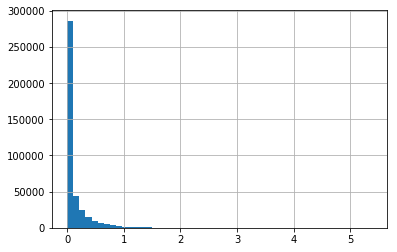

In [19]:
raster_data['Strength'].hist(bins=50)
plt.show()

In [20]:
# save the new larger data set
#raster_data.to_csv('raster_data.csv')

In [21]:
print(raster_data.shape)
raster_data.head()

(403956, 1045)


,Name,Title,Strength,SourceIDs,Date,CharTag,TimeLive,TimeTrue,HalfLife,Weight,...,Channel1016,Channel1017,Channel1018,Channel1019,Channel1020,Channel1021,Channel1022,Channel1023,Norm,TotCounts
0,BABA10,ABQ,0.001130,Ba133,03-Mar-2017 12:59:4,,84754.1,86400,0,0,...,0.010153,0.010015,0.00985,0.00966,0.009453,0.009235,0.009014,0.008793,0.176814,1671.095127
1,BABA10,ABQ,0.002261,Ba133,03-Mar-2017 12:59:4,,84754.1,86400,0,0,...,0.010153,0.010015,0.00985,0.00966,0.009453,0.009235,0.009014,0.008793,0.176814,1672.981826
2,BABA10,ABQ,0.003391,Ba133,03-Mar-2017 12:59:4,,84754.1,86400,0,0,...,0.010153,0.010015,0.00985,0.00966,0.009453,0.009235,0.009014,0.008793,0.176814,1674.868525
3,BABA10,ABQ,0.004521,Ba133,03-Mar-2017 12:59:4,,84754.1,86400,0,0,...,0.010153,0.010015,0.00985,0.00966,0.009453,0.009235,0.009014,0.008793,0.176814,1676.755223
4,BABA10,ABQ,0.005651,Ba133,03-Mar-2017 12:59:4,,84754.1,86400,0,0,...,0.010153,0.010015,0.00985,0.00966,0.009453,0.009235,0.009014,0.008793,0.176814,1678.641922


In [22]:
#raster_df = pd.read_csv('raster_df.csv')

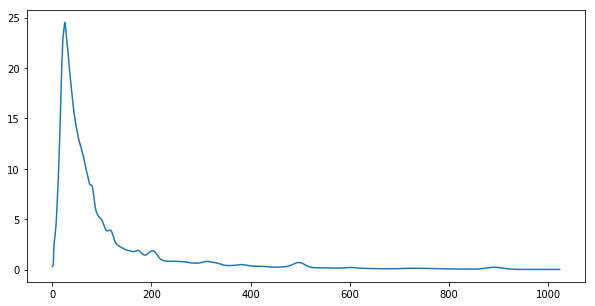

In [23]:
# a quick plot to see one spectrum
y = raster_df.loc[1, 'Channel0':'Channel1023']
x = range(0,1024)
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.show()

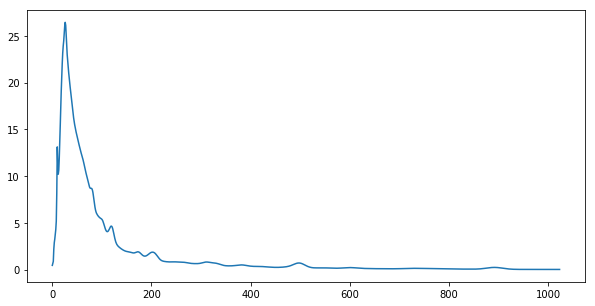

In [24]:
# a quick plot to see one spectrum
y = raster_df.loc[40, 'Channel0':'Channel1023']
x = range(0,1024)
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.show()

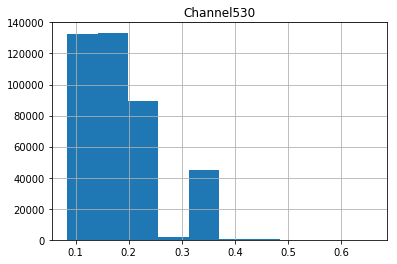

In [25]:
# choosing a channel above the 1460keV peak to use for normalization

raster_data.hist(column='Channel530')
plt.show()

### Step 2: we will Poisson sample the spectra

In [26]:
def sample_data(df):
    df.loc[:,'Channel0':'Channel1023'] = np.random.poisson(df.loc[:,'Channel0':'Channel1023'])
    return df

In [27]:
samp_data = sample_data(pd.DataFrame.copy(raster_data))

(403956, 1045)
(0, 1045)
(0, 1045)
(0, 1045)
(99, 1045)
(121, 1045)
(9, 1045)


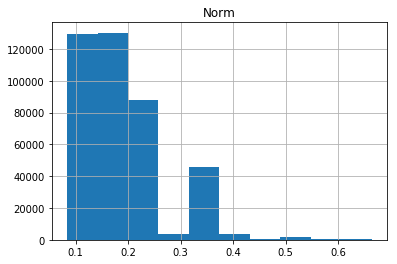

In [28]:
print(samp_data.shape)
bad_samp = samp_data.copy()
bad_orig = raster_data.copy()[raster_data['Norm'] == 0.]
bad_samp = bad_samp[bad_samp['Norm'] == 0.0000]
bad_bckg = data_bg_1sec.copy()[data_bg_1sec['Norm'] == 0.]
bad_source = data_source_1sec.copy()[data_source_1sec['Norm'] == 0.]
good_source = data_source_1sec.copy()[data_source_1sec['Norm'] != 0.]
print(bad_samp.shape)
print(bad_orig.shape)
print(bad_bckg.shape)
print(bad_source.shape)
print(good_source.shape)
print(data_bg_1sec.shape)
samp_data.hist(column='Norm')
plt.show()

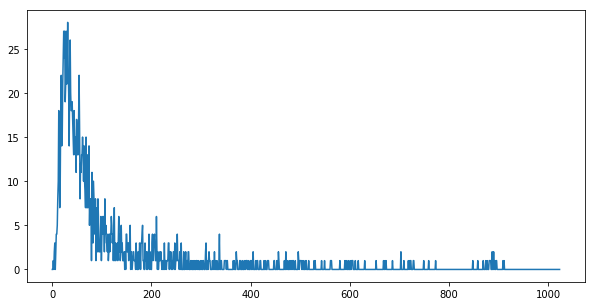

In [29]:
# a quick plot to see one spectrum
y = samp_data.loc[5,'Channel0':'Channel1023']
x = range(0,1024)
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.show()

### Step 3: normalize each spectrum to Channel 530

In [30]:
# this function takes one data frames and normalizes it
# the results is that all spectra have 1 count in channel 530

def normalize_data(df, scale):
    k = scale*df.loc[:,'Norm'].values.reshape((1,len(df))).T
    df.loc[:,'Channel0':'Channel1023'] = np.divide(df.loc[:,'Channel0':'Channel1023'], k)
    return df

In [31]:
#df_bad = pd.DataFrame.copy([(df.select_dtypes(include=['number']) = 0).any(1)])
#pd.DataFrame.copy(samp_data)


In [32]:
df_norm = normalize_data(pd.DataFrame.copy(samp_data), 1)
print(df_norm.shape)
df_norm.head()

(403956, 1045)


,Name,Title,Strength,SourceIDs,Date,CharTag,TimeLive,TimeTrue,HalfLife,Weight,...,Channel1016,Channel1017,Channel1018,Channel1019,Channel1020,Channel1021,Channel1022,Channel1023,Norm,TotCounts
0,BABA10,ABQ,0.001130,Ba133,03-Mar-2017 12:59:4,,84754.1,86400,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176814,1671.095127
1,BABA10,ABQ,0.002261,Ba133,03-Mar-2017 12:59:4,,84754.1,86400,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176814,1672.981826
2,BABA10,ABQ,0.003391,Ba133,03-Mar-2017 12:59:4,,84754.1,86400,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176814,1674.868525
3,BABA10,ABQ,0.004521,Ba133,03-Mar-2017 12:59:4,,84754.1,86400,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176814,1676.755223
4,BABA10,ABQ,0.005651,Ba133,03-Mar-2017 12:59:4,,84754.1,86400,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176814,1678.641922


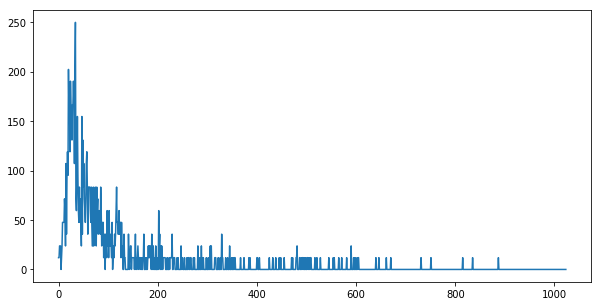

In [33]:
# a quick plot to see one spectrum
y = df_norm.loc[15000, 'Channel0':'Channel1023']
x = range(0,1024)
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.show()

In [36]:
# save the new larger data set
df_norm.to_csv('industrial_data_norm2.csv')
#samp_data.to_csv('industrial_data2.csv')

### We started with 36 source, and 9 background assympotic spectra and now have ~200k unique, 1 second source+background combinations. Let's go train a model! 